---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 2

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

## Part 1 - Regression

First, run the following block to set up the variables needed for later sections.

<IPython.core.display.Javascript object>


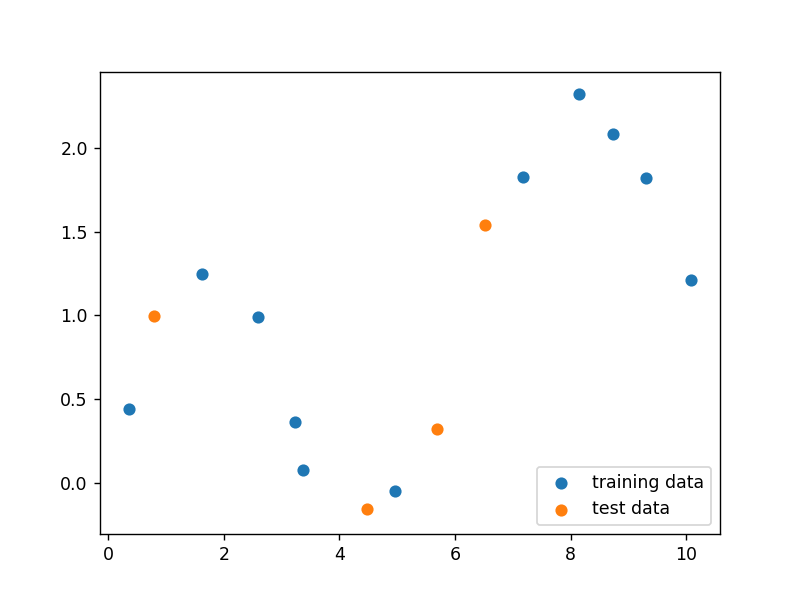

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment to the autograder**.   
part1_scatter()

### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="readonly/polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

XTrain=X_train.reshape(-1,1)
Xpoly_train=PolynomialFeatures(degree=3).fit_transform(XTrain)
#X_train=X_train.reshape(-1,1)

lr_temp=LinearRegression()
print ("Training dataset dimensions:", Xpoly_train.shape, y_train.shape)
lr_temp.fit(Xpoly_train, y_train)

np.round_(Xpoly_train, decimals=2)

Training dataset dimensions: (11, 4) (11,)


array([[  1.00000000e+00,   1.00900000e+01,   1.01780000e+02,
          1.02687000e+03],
       [  1.00000000e+00,   3.23000000e+00,   1.04400000e+01,
          3.37200000e+01],
       [  1.00000000e+00,   1.62000000e+00,   2.64000000e+00,
          4.29000000e+00],
       [  1.00000000e+00,   9.31000000e+00,   8.66800000e+01,
          8.06970000e+02],
       [  1.00000000e+00,   7.17000000e+00,   5.14300000e+01,
          3.68860000e+02],
       [  1.00000000e+00,   4.97000000e+00,   2.47000000e+01,
          1.22740000e+02],
       [  1.00000000e+00,   8.15000000e+00,   6.63900000e+01,
          5.40940000e+02],
       [  1.00000000e+00,   2.59000000e+00,   6.71000000e+00,
          1.73900000e+01],
       [  1.00000000e+00,   3.50000000e-01,   1.20000000e-01,
          4.00000000e-02],
       [  1.00000000e+00,   3.38000000e+00,   1.14000000e+01,
          3.84800000e+01],
       [  1.00000000e+00,   8.72000000e+00,   7.61000000e+01,
          6.63880000e+02]])

In [64]:
temp=np.linspace(0,10,5).reshape(-1,1)
Xpoly_test=PolynomialFeatures(degree=3).fit_transform(temp)
print (Xpoly_test)
lr_temp.predict(Xpoly_test)

[[    1.        0.        0.        0.   ]
 [    1.        2.5       6.25     15.625]
 [    1.        5.       25.      125.   ]
 [    1.        7.5      56.25    421.875]
 [    1.       10.      100.     1000.   ]]


array([ 1.22989539,  0.35895717,  0.9326046 ,  1.74531338,  1.5915592 ])

In [8]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    model_degrees=[1,3,6,9]
    xin_vals=np.linspace(0,10,100).reshape(-1,1)
      
    for poly_deg in model_degrees:
        
        XTrain=X_train.reshape(-1,1)
        
        Xpoly_train=PolynomialFeatures(degree=poly_deg).fit_transform(XTrain)
        Xpoly_test=PolynomialFeatures(degree=poly_deg).fit_transform(xin_vals)
        
        LR_Model=LinearRegression().fit(Xpoly_train, y_train)
    
        yhat=LR_Model.predict(Xpoly_test).reshape(1, -1)
        
        if poly_deg == 1:
            y_pred=yhat
        else:
            y_pred=np.append(y_pred, yhat, axis=0)
    
    return y_pred

answer_one()

array([[  2.53040195e-01,   2.69201547e-01,   2.85362899e-01,
          3.01524251e-01,   3.17685603e-01,   3.33846955e-01,
          3.50008306e-01,   3.66169658e-01,   3.82331010e-01,
          3.98492362e-01,   4.14653714e-01,   4.30815066e-01,
          4.46976417e-01,   4.63137769e-01,   4.79299121e-01,
          4.95460473e-01,   5.11621825e-01,   5.27783177e-01,
          5.43944529e-01,   5.60105880e-01,   5.76267232e-01,
          5.92428584e-01,   6.08589936e-01,   6.24751288e-01,
          6.40912640e-01,   6.57073992e-01,   6.73235343e-01,
          6.89396695e-01,   7.05558047e-01,   7.21719399e-01,
          7.37880751e-01,   7.54042103e-01,   7.70203454e-01,
          7.86364806e-01,   8.02526158e-01,   8.18687510e-01,
          8.34848862e-01,   8.51010214e-01,   8.67171566e-01,
          8.83332917e-01,   8.99494269e-01,   9.15655621e-01,
          9.31816973e-01,   9.47978325e-01,   9.64139677e-01,
          9.80301028e-01,   9.96462380e-01,   1.01262373e+00,
        

In [9]:
temp_pred=answer_one()
temp_pred[:,0:5]

array([[  2.53040195e-01,   2.69201547e-01,   2.85362899e-01,
          3.01524251e-01,   3.17685603e-01],
       [  1.22989539e+00,   1.15143628e+00,   1.07722393e+00,
          1.00717881e+00,   9.41221419e-01],
       [ -1.99554310e-01,  -3.95192724e-03,   1.79851752e-01,
          3.51005136e-01,   5.08831706e-01],
       [  6.79502285e+00,   4.14319957e+00,   2.23123322e+00,
          9.10495532e-01,   5.49803315e-02]])

<IPython.core.display.Javascript object>


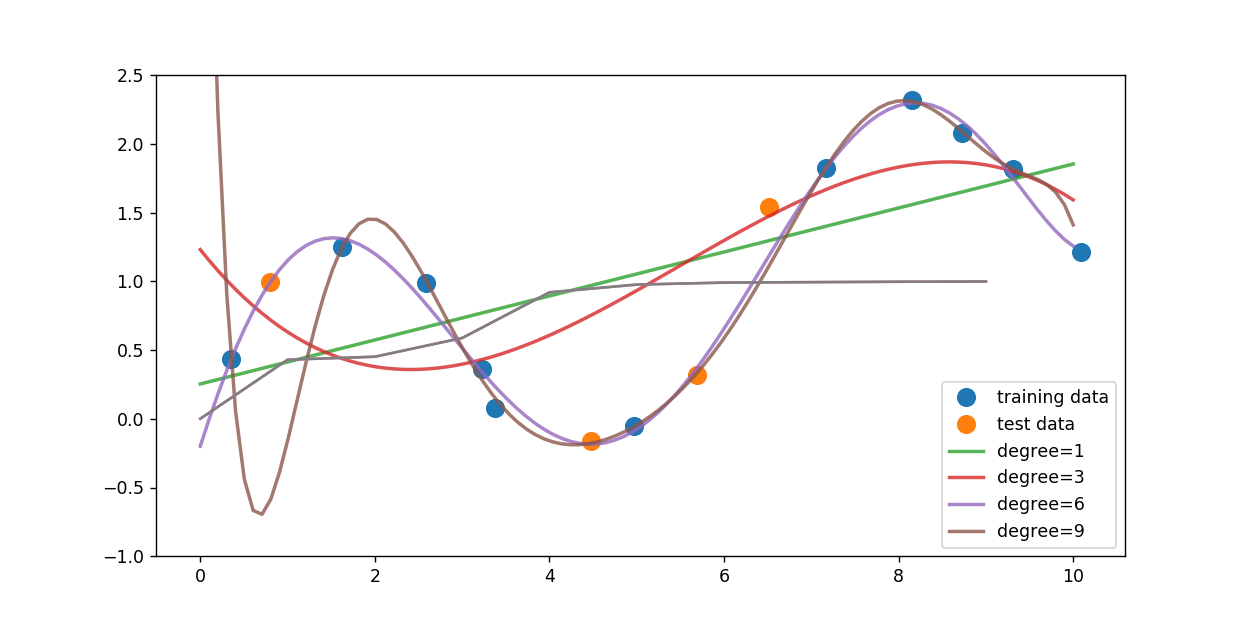

[ 0.2530402   0.26920155  0.2853629   0.30152425  0.3176856 ]
[ 1.22989539  1.15143628  1.07722393  1.00717881  0.94122142]
[-0.19955431 -0.00395193  0.17985175  0.35100514  0.50883171]
[ 6.79502285  4.14319957  2.23123322  0.91049553  0.05498033]


In [10]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        print (degree_predictions[i][0:5])
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one()) ## Re-comment before submit

### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [36]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score

    r2_train, r2_test=np.array([]), np.array([])
      
    XTrain=X_train.reshape(-1,1)
    XTest=X_test.reshape(-1,1)
        
    for poly_deg in range(0,10):
        
        Xpoly_train=PolynomialFeatures(degree=poly_deg).fit_transform(XTrain)
        Xpoly_test=PolynomialFeatures(degree=poly_deg).fit_transform(XTest)
        
        LR_Model=LinearRegression().fit(Xpoly_train, y_train)
    
        yhat_train=LR_Model.predict(Xpoly_train)#.reshape(1, -1)
        yhat_test=LR_Model.predict(Xpoly_test)#.reshape(1, -1)
        
        train_score=r2_score(y_train, yhat_train)
        test_score=r2_score(y_test, yhat_test)
        
        r2_train=np.append(r2_train, train_score)
        r2_test=np.append(r2_test, test_score)
        
    return (r2_train, r2_test)

(array([ 0.        ,  0.42924578,  0.4510998 ,  0.58719954,  0.91941945,
         0.97578641,  0.99018233,  0.99352509,  0.99637545,  0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247951, -0.64525377]))

<IPython.core.display.Javascript object>


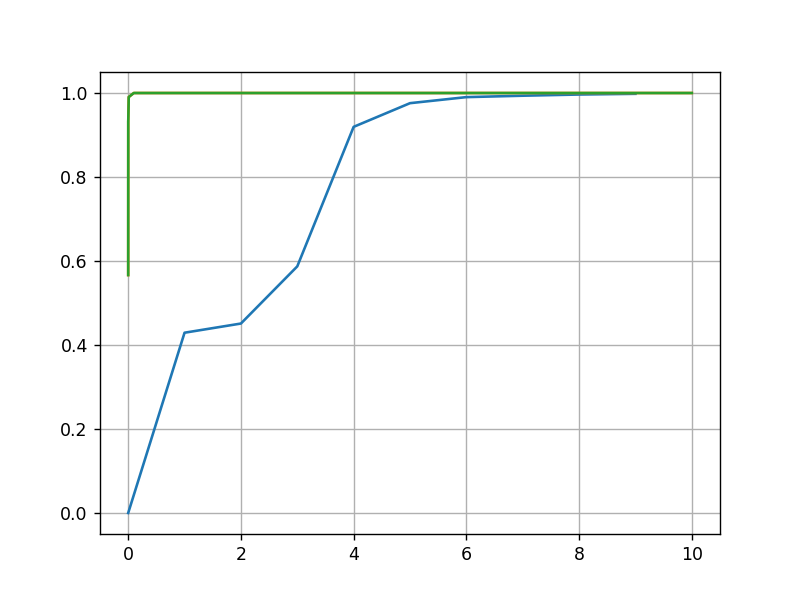

In [37]:
import matplotlib.pyplot as plt
%matplotlib notebook
train_r2=answer_two()[0]

plt.plot(list(range(0,10)), train_r2)
plt.grid()
plt.show()

### Question 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

Hint: Try plotting the $R^2$ scores from question 2 to visualize the relationship between degree level and $R^2$. Remember to comment out the import matplotlib line before submission.

*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`. There might be multiple correct solutions, however, you only need to return one possible solution, for example, (1,2,3).* 

In [29]:
def answer_three():
    
    train_r2=answer_two()[0]
    
    return (1,9,4)

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [53]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score

    XTrain=X_train.reshape(-1,1)
    XTest=X_test.reshape(-1,1)
        
    Xpoly_train=PolynomialFeatures(degree=12).fit_transform(XTrain)
    Xpoly_test=PolynomialFeatures(degree=12).fit_transform(XTest)
        
    lin_reg=LinearRegression().fit(Xpoly_train, y_train)
    lasso_reg=Lasso(alpha=0.01, max_iter=10000).fit(Xpoly_train, y_train)
    
    lr_score, lasso_score = lin_reg.score(Xpoly_test, y_test), lasso_reg.score(Xpoly_test, y_test)
    
    return lr_score, lasso_score

answer_four()

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(-4.3120017974975458, 0.8406625614750235)

## Part 2 - Classification

Here's an application of machine learning that could save your life! For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `readonly/mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('readonly/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

### Question 5

Using `X_train2` and `y_train2` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

As a reminder, the feature names are available in the `X_train2.columns` property, and the order of the features in `X_train2.columns` matches the order of the feature importance values in the classifier's `feature_importances_` property. 

*This function should return a list of length 5 containing the feature names in descending order of importance.*

*Note: remember that you also need to set random_state in the DecisionTreeClassifier.*

In [78]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier

    dtree_clf=DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)
    features_imp_stats=dtree_clf.feature_importances_
    
    df_feature_imp=pd.DataFrame(features_imp_stats).T
    df_feature_imp.columns=X_mush.columns
    
    top_five_features=df_feature_imp.T.sort_values(by=0, ascending=False)
    
    return list(top_five_features.head(5).index)

answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Question 6

For this question, we're going to use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.  Recall that the validation_curve function, in addition to taking an initialized unfitted classifier object, takes a dataset as input and does its own internal train-test splits to compute results.

**Because creating a validation curve requires fitting multiple models, for performance reasons this question will use just a subset of the original mushroom dataset: please use the variables X_subset and y_subset as input to the validation curve function (instead of X_mush and y_mush) to reduce computation time.**

The initialized unfitted classifier object we'll be using is a Support Vector Classifier with radial basis kernel.  So your first step is to create an `SVC` object with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  

With this classifier, and the dataset in X_subset, y_subset, explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`). Recall that you can specify what scoring metric you want validation_curve to use by setting the "scoring" parameter.  In this case, we want to use "accuracy" as the scoring metric.

For each level of `gamma`, `validation_curve` will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

Find the mean score across the three models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function should return one tuple of numpy arrays `(training_scores, test_scores)` where each array in the tuple has shape `(6,)`.*

In [86]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve

    SVC_clf=SVC(kernel='rbf', C=1, random_state=0)
    SVC_clf.fit(X_train2, y_train2)
    
    parameters=np.logspace(-4,1,6)
    #print (np.round_(parameters, 3))
    
    train_scores, test_scores = validation_curve(SVC_clf, X_subset, y_subset,
                                            param_name='gamma',
                                            param_range=parameters, cv=3, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    #print (train_scores, "\n", train_scores_mean)
    
    return train_scores_mean
    
answer_six()

array([ 0.56647847,  0.93155951,  0.99039881,  1.        ,  1.        ,  1.        ])

### Question 7

Based on the scores from question 6, what gamma value corresponds to a model that is underfitting (and has the worst test set accuracy)? What gamma value corresponds to a model that is overfitting (and has the worst test set accuracy)? What choice of gamma would be the best choice for a model with good generalization performance on this dataset (high accuracy on both training and test set)? 

Hint: Try plotting the scores from question 6 to visualize the relationship between gamma and accuracy. Remember to comment out the import matplotlib line before submission.

*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)` Please note there is only one correct solution.*

In [87]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

SVC_clf=SVC(kernel='rbf', C=1, random_state=0)
SVC_clf.fit(X_train2, y_train2)
    
parameters=np.logspace(-4,1,6)

train_scores, test_scores = validation_curve(SVC_clf, X_subset, y_subset,
                                            param_name='gamma',
                                            param_range=parameters, cv=3, scoring='accuracy')

In [110]:
parameters=np.logspace(-4,1,6)
np.round_(parameters, decimals=2)

array([  0.  ,   0.  ,   0.01,   0.1 ,   1.  ,  10.  ])

In [101]:
print (train_scores, "\n"*2, train_scores_mean)

[[ 0.58906135  0.55686854  0.55350554]
 [ 0.93200296  0.9254062   0.93726937]
 [ 0.99039172  0.99039882  0.9904059 ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]] 

 [ 0.56647847  0.93155951  0.99039881  1.          1.          1.        ]


<IPython.core.display.Javascript object>


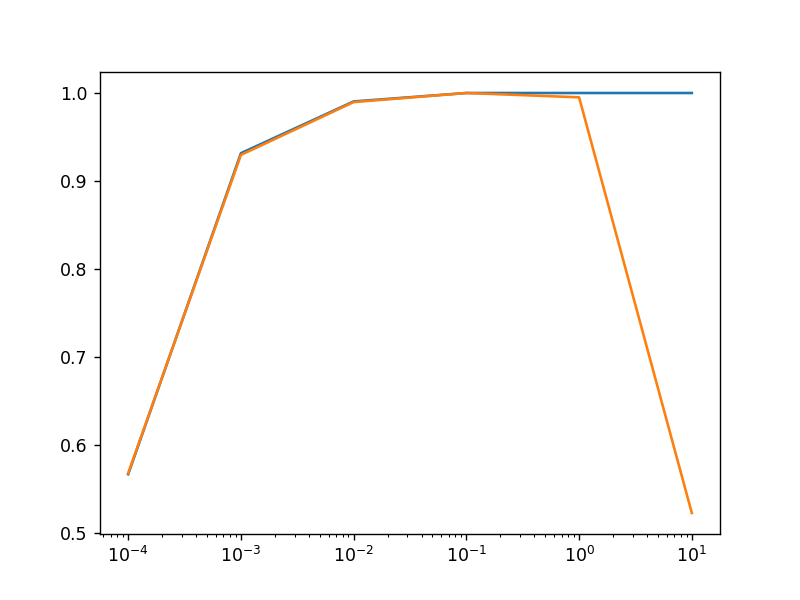

In [114]:
%matplotlib notebook

parameters=np.logspace(-4,1,6)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.semilogx(parameters, train_scores_mean, label='Training')
plt.semilogx(parameters, test_scores_mean, label='Testing')
plt.show()

<IPython.core.display.Javascript object>


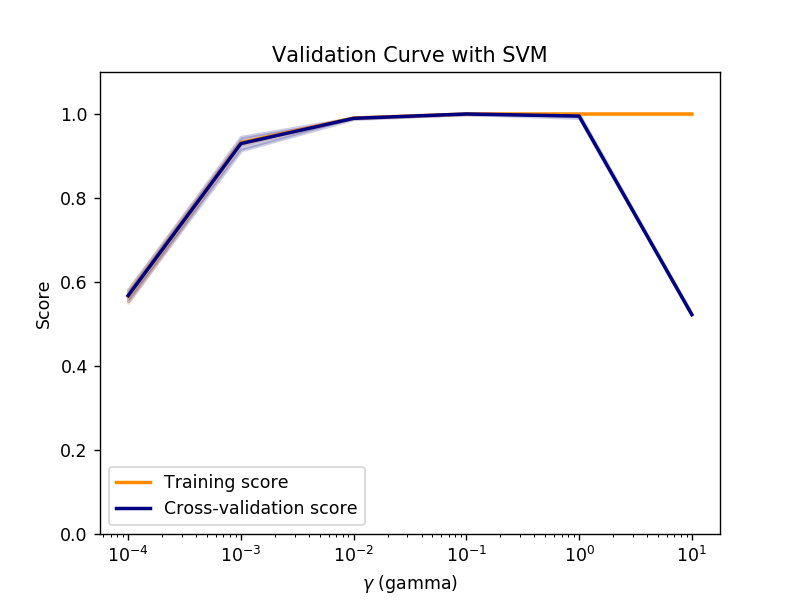

In [112]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(parameters, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(parameters, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(parameters, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(parameters, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

In [ ]:
def answer_seven():
    
    # Your code here
    
    return # Return your answer